# Dataset-Mental-Disorders


La segunda práctica consiste en seleccionar un Dataset de interés (se puede elegir el dataset de la práctica 1), y aplicar al menos tres técnicas de los siguientes tipos de procesamiento:
1. Limpieza de datos
2. Aumento de datos
3. Extracción de características
4. Reducción de dimensionalidad
5. Selección de características

Por ejemplo, eliminación de datos incompletos (limpieza de datos), PCA (reducción de dimensionalidad), y ganancia de información (selección de atributos). Sobra decir que se requiere realizar un análisis exploratorio de los datos.


In [1]:
cd

C:\Users\Jesus


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:428: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
cd Downloads/icd2024Gortarez/practices

C:\Users\Jesus\Downloads\icd2024Gortarez\practices


c:\Users\Jesus\.conda\envs\DataScience\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Acerca del conjunto de datos: Una colección de 120 pacientes de psicología con 17 síntomas esenciales para diagnosticar trastorno bipolar maniaco, trastorno bipolar depresivo, trastorno depresivo mayor y personas normales.

El conjunto de datos contiene los 17 síntomas esenciales que los psiquiatras utilizan para diagnosticar los trastornos descritos. Los síntomas conductuales incluyen los niveles de tristeza, agotamiento, euforia, trastornos del sueño, cambios de humor, pensamientos suicidas, anorexia, ansiedad, intento de explicación, colapso nervioso, ignorar y seguir adelante, admitir errores, sobrepensar, respuesta agresiva, optimismo, actividad sexual y concentración en un formato de valores separados por comas (CSV).

La categoría "Normal" se refiere a las personas que utilizan el tiempo de terapia para asesoramiento especializado, desarrollo personal y enriquecimiento de habilidades para la vida. Aunque estas personas también pueden tener problemas mentales menores, se diferencian de aquellos que padecen trastorno depresivo mayor y trastorno bipolar.


Se buca analizar los datos y su relacion entre ellos de manera general.


In [3]:
import pandas
pandas.__version__

'2.2.2'

## Visión general de los datos


In [1]:
import pandas as pd

df = pd.read_csv("Practica 2 Deepression.csv")

df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


---


**_Imprime un resumen del DataFrame, mostrando información sobre las columnas, el tipo de datos, y cuántos valores no nulos tiene cada una. Necesario para asegurarse de que la base de datos no caresca de algun dato._**


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Number             813 non-null    int64  
 1   Sleep              540 non-null    float64
 2   Appetite           540 non-null    float64
 3   Interest           540 non-null    float64
 4   Fatigue            540 non-null    float64
 5   Worthlessness      540 non-null    float64
 6   Concentration      540 non-null    float64
 7   Agitation          540 non-null    float64
 8   Suicidal Ideation  540 non-null    float64
 9   Sleep Disturbance  540 non-null    float64
 10  Aggression         540 non-null    float64
 11  Panic Attacks      540 non-null    float64
 12  Hopelessness       540 non-null    float64
 13  Restlessness       540 non-null    float64
 14  Low Energy         540 non-null    float64
 15  Depression State   540 non-null    object 
dtypes: float64(14), int64(1), 

---


**_Imprime estadísticas descriptivas para las columnas numéricas del DataFrame, como media, desviación estándar, y cuartiles._**


In [3]:
print(df.describe())

          Number        Sleep    Appetite    Interest     Fatigue  \
count  813.000000  540.000000  540.000000  540.000000  540.000000   
mean   407.000000    2.912963    2.777778    2.785185    2.964815   
std    234.837178    1.738417    1.675610    1.680998    1.727402   
min      1.000000    1.000000    1.000000    1.000000    1.000000   
25%    204.000000    1.000000    1.000000    1.000000    1.000000   
50%    407.000000    2.000000    2.000000    2.000000    2.000000   
75%    610.000000    5.000000    5.000000    5.000000    5.000000   
max    813.000000    6.000000    5.000000    5.000000    6.000000   

       Worthlessness  Concentration   Agitation  Suicidal Ideation  \
count     540.000000     540.000000  540.000000         540.000000   
mean        2.957407       2.777778    2.968519           2.964815   
std         1.740077       1.673394    1.719939           1.733834   
min         1.000000       1.000000    1.000000           1.000000   
25%         1.000000       1

---


**_Muestra la cantidad de valores faltantes (NaN) en cada columna del DataFrame._**


In [4]:
print(df.isna().sum())

Number                 0
Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64


---


**_Imprime las dimensiones del DataFrame en forma de una tupla (número de filas, número de columnas)_**


In [5]:
print(df.shape)

(813, 16)


---


**_Una práctica que podría ser útil en el futuro y por eso la menciono aquí es calcular el porcentaje de valores nulos en un conjunto de datos._**


In [6]:
missing_values = df.isnull().sum()
missing_rate = (missing_values / len(df)) * 100
print(missing_rate)

Number                0.000000
Sleep                33.579336
Appetite             33.579336
Interest             33.579336
Fatigue              33.579336
Worthlessness        33.579336
Concentration        33.579336
Agitation            33.579336
Suicidal Ideation    33.579336
Sleep Disturbance    33.579336
Aggression           33.579336
Panic Attacks        33.579336
Hopelessness         33.579336
Restlessness         33.579336
Low Energy           33.579336
Depression State     33.579336
dtype: float64


**_Para este dataset como vimos antes no hay ningún faltante._**


---


**_Muestra el número de datos duplicados en caso de existir._**


In [7]:
df.duplicated().sum()

0

In [11]:
df.duplicated(subset=df.columns.difference(['Depression State'])).sum()

0

---


## Limpieza de datos


**_Muestra los nombres de las columnas y los datos que toman cada una de ellas._**


In [11]:
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(column_name,":",df[column_name].unique())
    
df.value_counts(normalize=True)

count = df.nunique()



Patient Number : ['Patiant-01' 'Patiant-02' 'Patiant-03' 'Patiant-04' 'Patiant-05'
 'Patiant-06' 'Patiant-07' 'Patiant-08' 'Patiant-09' 'Patiant-10'
 'Patiant-11' 'Patiant-12' 'Patiant-13' 'Patiant-14' 'Patiant-15'
 'Patiant-16' 'Patiant-17' 'Patiant-18' 'Patiant-19' 'Patiant-20'
 'Patiant-21' 'Patiant-22' 'Patiant-23' 'Patiant-24' 'Patiant-25'
 'Patiant-26' 'Patiant-27' 'Patiant-28' 'Patiant-29' 'Patiant-30'
 'Patiant-31' 'Patiant-32' 'Patiant-33' 'Patiant-34' 'Patiant-35'
 'Patiant-36' 'Patiant-37' 'Patiant-38' 'Patiant-39' 'Patiant-40'
 'Patiant-41' 'Patiant-42' 'Patiant-43' 'Patiant-44' 'Patiant-45'
 'Patiant-46' 'Patiant-47' 'Patiant-48' 'Patiant-49' 'Patiant-50'
 'Patiant-51' 'Patiant-52' 'Patiant-53' 'Patiant-54' 'Patiant-55'
 'Patiant-56' 'Patiant-57' 'Patiant-58' 'Patiant-59' 'Patiant-60'
 'Patiant-61' 'Patiant-62' 'Patiant-63' 'Patiant-64' 'Patiant-65'
 'Patiant-66' 'Patiant-67' 'Patiant-68' 'Patiant-69' 'Patiant-70'
 'Patiant-71' 'Patiant-72' 'Patiant-73' 'Patiant-74' 'Patia

---


**_Teniendo esto podemos ver varios detalles:_**

1. En la columna "Patient Number" hay letras y caracteres especiales que no son útiles para nuestro análisis, por lo que los eliminaremos.
2. En la columna "Suicidal Thoughts" hay dos variantes de "YES". Necesitaremos unificar estos valores para asegurar consistencia.
3. Las columnas "Sexual Activity", "Concentration", "Optimism" son de tipo numérico, por lo que las dejaremos como números para que sean útiles en el análisis.
4. Las columnas "Sadness", "Euphoric", "Exhausted", y "Sleep Disorder" también representan rangos y deben ser convertidas a valores numéricos.
5. Los valores de "YES" y "NO" se convertirán a 0 y 1, respectivamente, para facilitar su uso en el análisis.


In [12]:
# Solucion 1
df['Patient Number'] = df['Patient Number'].str[8:].astype(int)

# Solucion 2
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', 'YES')

# Solucion 3
dict = {'0 From 10': 0, '1 From 10': 1, '2 From 10': 2, '3 From 10': 3, '4 From 10': 4, '6 From 10': 6, '5 From 10': 5, '7 From 10': 7, '8 From 10': 8,
 '9 From 10': 9, '10 From 10': 10}

df['Sexual Activity'] = df['Sexual Activity'].replace(dict).astype(int)
df['Concentration'] = df['Concentration'].replace(dict).astype(int)
df['Optimisim'] = df['Optimisim'].replace(dict).astype(int)

# Solucion 4
dict = {'Seldom': 1, 'Sometimes': 2, 'Usually': 3, 'Most-Often': 4}

df['Sadness'] = df['Sadness'].replace(dict).astype(int)
df['Euphoric'] = df['Euphoric'].replace(dict).astype(int)
df['Exhausted'] = df['Exhausted'].replace(dict).astype(int)
df['Sleep dissorder'] = df['Sleep dissorder'].replace(dict).astype(int)

# Solucion 5
dict = ['Mood Swing', 'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
                  'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
                  'Admit Mistakes', 'Overthinking']
df[dict] = df[dict].replace({'YES': 1, 'NO': 0})

---


**Algo muy importante que experimenté en 2022 es que el índice puede causar problemas al comparar datos en un heatmap. Por lo tanto, eliminaré el índice y también los números de los pacientes, ya que no serán útiles en este análisis y podrían generar probelmas en el heatmap.**


In [13]:
df = df.drop('Patient Number', axis=1)
df.reset_index(drop=True, inplace=True)

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    int32 
 1   Euphoric             120 non-null    int32 
 2   Exhausted            120 non-null    int32 
 3   Sleep dissorder      120 non-null    int32 
 4   Mood Swing           120 non-null    int64 
 5   Suicidal thoughts    120 non-null    int64 
 6   Anorxia              120 non-null    int64 
 7   Authority Respect    120 non-null    int64 
 8   Try-Explanation      120 non-null    int64 
 9   Aggressive Response  120 non-null    int64 
 10  Ignore & Move-On     120 non-null    int64 
 11  Nervous Break-down   120 non-null    int64 
 12  Admit Mistakes       120 non-null    int64 
 13  Overthinking         120 non-null    int64 
 14  Sexual Activity      120 non-null    int32 
 15  Concentration        120 non-null    int32 
 16  Optimisi

## Visualización


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

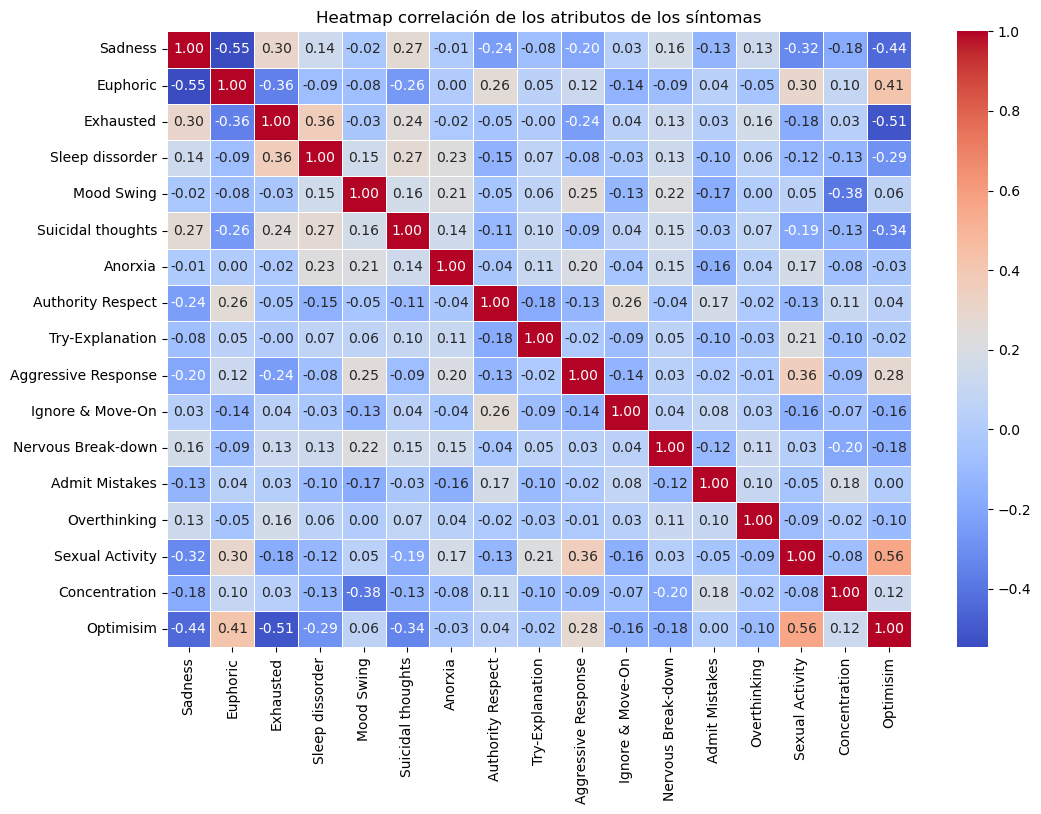

In [16]:
# Heatmap para visualizar relaciones o patrones
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Expert Diagnose']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap correlación de los atributos de los síntomas')
plt.show()

**_Frecuencia o proporción de pacientes con síntomas o diagnósticos específicos._**


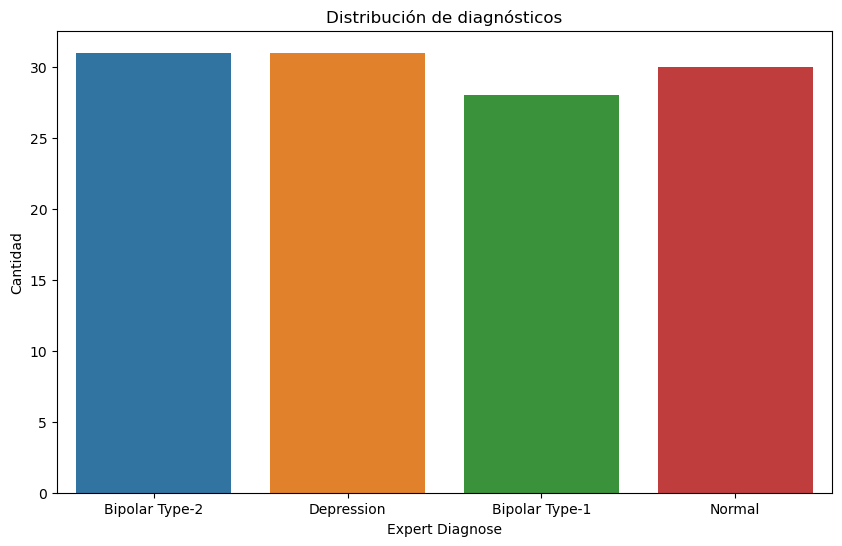

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Expert Diagnose')
plt.title('Distribución de diagnósticos')
plt.xlabel('Expert Diagnose')
plt.ylabel('Cantidad')
plt.show()

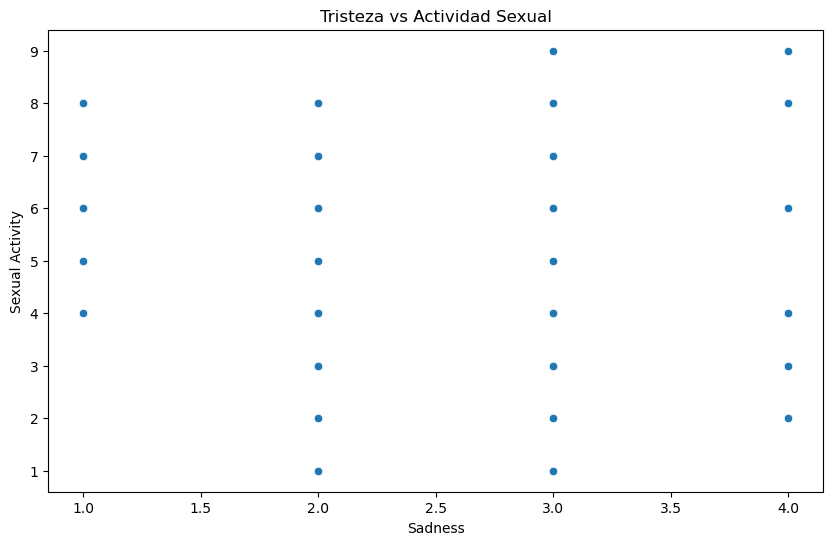

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Sadness', y='Sexual Activity')
plt.title('Tristeza vs Actividad Sexual')
plt.xlabel('Sadness')
plt.ylabel('Sexual Activity')
plt.show()

Algo curioso que podemos notar aquí es que, aunque parece lógico que a menor tristeza los datos muestren un mayor puntaje de actividad sexual, observamos que en el extremo de la tristeza también se presenta el mayor puntaje de actividad sexual. Esto podría parecer erróneo, pero en síntomas más profundos de la depresión y la bipolaridad se puede observar hipersexualidad. Por lo tanto, este patrón también puede tener sentido si se interpretan correctamente estos datos.


## CONCLUSION

Si bien los datos son útiles para la práctica en introducción a la ciencia de datos y análisis exploratorio, el tema de la psicología y psiquiatría es más delicado que simplemente asignar valores de "sí" o "no". Por ejemplo, el cambio de estado de ánimo (Mood Swing) es muy subjetivo tanto para el observador como para el propio paciente. Además, se necesitarían detalles adicionales como la duración del episodio, el ritmo del cambio, entre otros, para poder clasificarlo adecuadamente como bipolaridad.

Ya que el dataset es limitado, no sería muy útil para machine learning, ya que se necesita entrenar el modelo con diagnósticos de expertos. Con solo 17 síntomas, no sería posible capturar la sutileza de los trastornos. Además, con la actualización actual del DSM-5, la depresión ya no se clasifica un solo trastorno, sino que se divide en: trastorno depresivo mayor, trastorno distímico y trastorno depresivo no especificado.
